# APOGEE RC DR14 Distance

E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/vac/apogee-rc/cat/apogee-rc-DR14.fits was found!
This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2000, parallax in mas
Moreover, indices correspond to APOGEE allstar DR14 file


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide


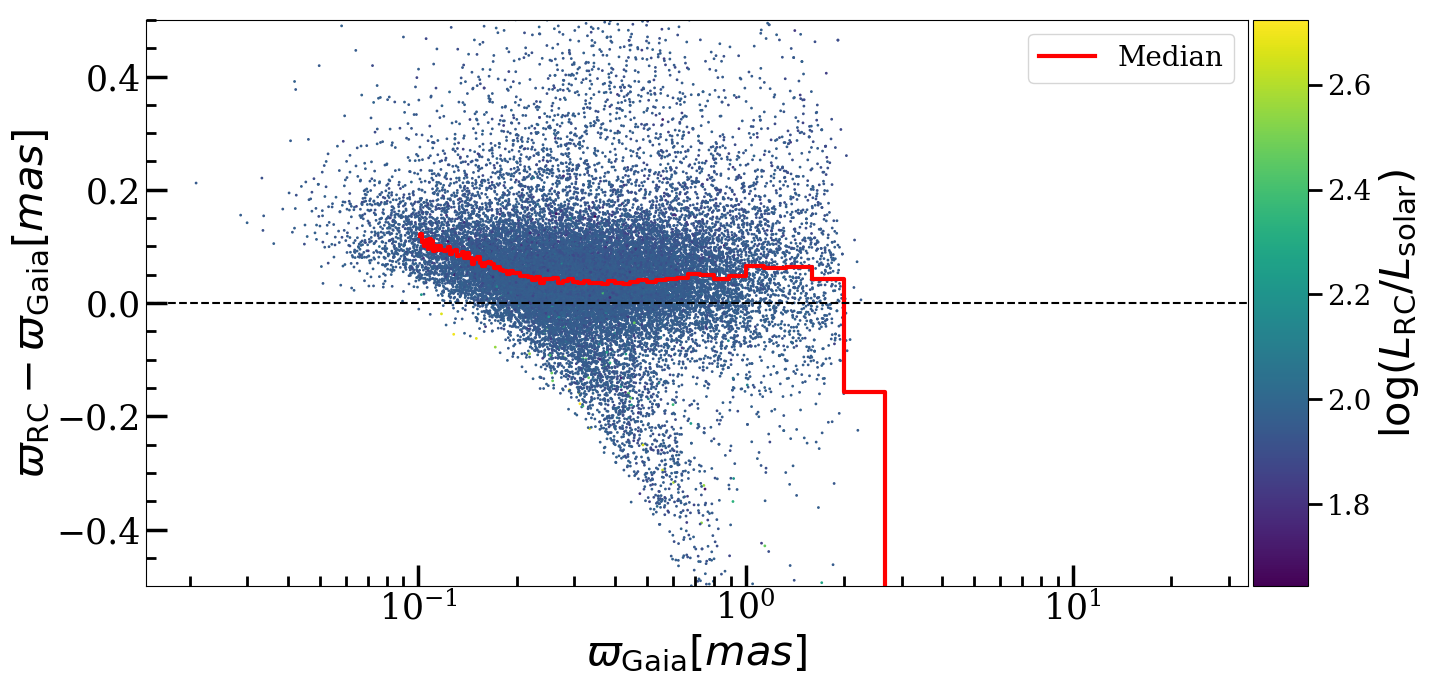

In [6]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astroNN.apogee import allstar
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_rc
from astroNN.gaia import gaiadr2_parallax, mag_to_fakemag, fakemag_to_logsol, extinction_correction

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

file = fits.open('apogee_dr14_nn_dist_raw.fits')
allstar_file = fits.getdata(allstar(dr=14))

ra_rc, dec_rc, distance = load_apogee_rc(dr=14, metric='distance', extinction=True)
ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=1.0, keepdims=True, offset=False)

corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_rc, colRA1=ra, colDec1=dec, colRA2=ra_rc, colDec2=dec_rc)

logsol = fakemag_to_logsol(mag_to_fakemag(corrected_K[idx_1], 1000 / distance[idx_2]))

good_idx = [(parallax[idx_1]>0.)]

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = 1000/distance[idx_2][good_idx] - parallax[idx_1][good_idx]

for i in range(number_bin):
    idx = [(1000/parallax[idx_1][good_idx]<spaces_dist[i+1]) & (1000/parallax[idx_1][good_idx]>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax[idx_1][good_idx], residue, c=logsol[good_idx], s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{RC}} - \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r"$\log (L_\mathrm{RC}/L_\mathrm{solar})$", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

In [1]:
import numpy as np
from astropy.io import fits

from astroNN.models import load_folder
from astroNN.gaia import fakemag_to_pc
from astroNN.apogee import allstar
from astroNN.gaia import extinction_correction
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_rc
from astroNN.nn.numpy import median_absolute_percentage_error

file = fits.open("contspec_dr14.fits")
all_spec = file[0].data

ra_rc, dec_rc, distance = load_apogee_rc(dr=14, metric='distance', extinction=True)
allstar_file = fits.getdata(allstar(dr=14))

ra, dec = allstar_file['RA'], allstar_file['DEC']
corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_rc, colRA1=ra, colDec1=dec, colRA2=ra_rc, colDec2=dec_rc)

distance = distance[idx_2]
corrected_K = corrected_K[idx_1]

net = load_folder("astroNN_0802_run001")
pred, pred_err = net.test(all_spec[idx_1])

good_idx = [pred[:, 0] / pred_err['total'][:, 0] > 0]
print("Median Absolute Percentage Error (RC DR14 and NN): ", 
      median_absolute_percentage_error(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], distance[good_idx]), " %")
print("Median Error (RC DR14 and NN): ", 
      np.median(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx] - distance[good_idx]), " parsec")

Using TensorFlow backend.


E:\sdss_mirror\dr14/apogee/vac/apogee-rc/cat/apogee-rc-DR14.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
Loaded astroNN model, model type: Bayesian Convolutional Neural Network -> ApogeeBCNN
Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 105.55s elapsed
Median Absolute Percentage Error (RC DR14 and NN):  4.584270881230705  %
Median Error (RC DR14 and NN):  11.119838381427144  parsec


# APOGEE BPG DR14 Distance

E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/vac/apogee-distances/apogee_distances-DR14.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2000, parallax in mas
Moreover, indices correspond to APOGEE allstar DR14 file


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


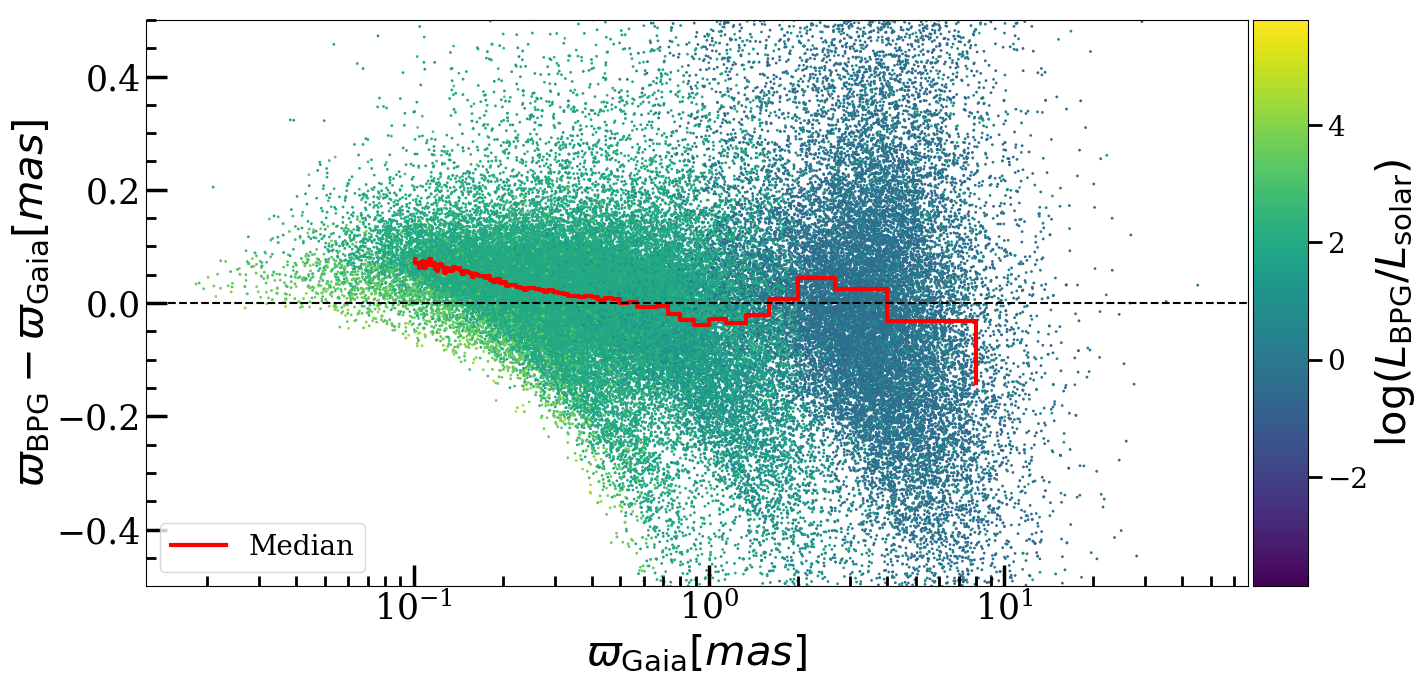

In [5]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astroNN.apogee import allstar
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_distances
from astroNN.gaia import gaiadr2_parallax, mag_to_fakemag, fakemag_to_logsol, extinction_correction

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

file = fits.open('apogee_dr14_nn_dist_raw.fits')
allstar_file = fits.getdata(allstar(dr=14))

ra_bpg, dec_bpg, distance, distance_err = load_apogee_distances(dr=14, metric='distance', cuts=0.2, keepdims=False)
ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=1.0, keepdims=True, offset=False)
corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_bpg, colRA1=ra, colDec1=dec, colRA2=ra_bpg, colDec2=dec_bpg)

logsol = fakemag_to_logsol(mag_to_fakemag(corrected_K[idx_1], 1000 / distance[idx_2]))

good_idx = [(parallax[idx_1]>0.) & (logsol != -9999.)]

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = 1000/distance[idx_2][good_idx] - parallax[idx_1][good_idx]

for i in range(number_bin):
    idx = [(1000/parallax[idx_1][good_idx]<spaces_dist[i+1]) & (1000/parallax[idx_1][good_idx]>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax[idx_1][good_idx], residue, c=logsol[good_idx], s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{BPG}} - \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r"$\log (L_\mathrm{BPG}/L_\mathrm{solar})$", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

In [1]:
import numpy as np
from astropy.io import fits

from astroNN.models import load_folder
from astroNN.gaia import fakemag_to_pc
from astroNN.apogee import allstar
from astroNN.gaia import extinction_correction
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_distances
from astroNN.nn.numpy import median_absolute_percentage_error

file = fits.open("contspec_dr14.fits")
all_spec = file[0].data

ra_bpg, dec_bpg, distance, distance_err = load_apogee_distances(dr=14, metric='distance', cuts=0.2, keepdims=False)
allstar_file = fits.getdata(allstar(dr=14))

ra, dec = allstar_file['RA'], allstar_file['DEC']
corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_bpg, colRA1=ra, colDec1=dec, colRA2=ra_bpg, colDec2=dec_bpg)

distance = distance[idx_2]
corrected_K = corrected_K[idx_1]

net = load_folder("astroNN_0802_run001")
pred, pred_err = net.test(all_spec[idx_1])

good_idx = [pred[:, 0] / pred_err['total'][:, 0] > 0]
print("Median Absolute Percentage Error (BPG distance DR14 and NN)", 
      median_absolute_percentage_error(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], distance[good_idx]), " %")
print("Median Error (BPG distance DR14 and NN): ", 
      np.median(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx] - distance[good_idx]), " parsec")

Using TensorFlow backend.


E:\sdss_mirror\dr14/apogee/vac/apogee-distances/apogee_distances-DR14.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
Loaded astroNN model, model type: Bayesian Convolutional Neural Network -> ApogeeBCNN
Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 324.26s elapsed
Median Absolute Percentage Error (BPG distance DR14 and NN) 8.756936  %
Median Error (BPG distance DR14 and NN):  -7.251831  parsec


dr is not provided, using default dr=14
E:\sdss_mirror\dr14/apogee/vac/apogee-distances/apogee_distances-DR14.fits was found!
dr is not provided, using default dr=14
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


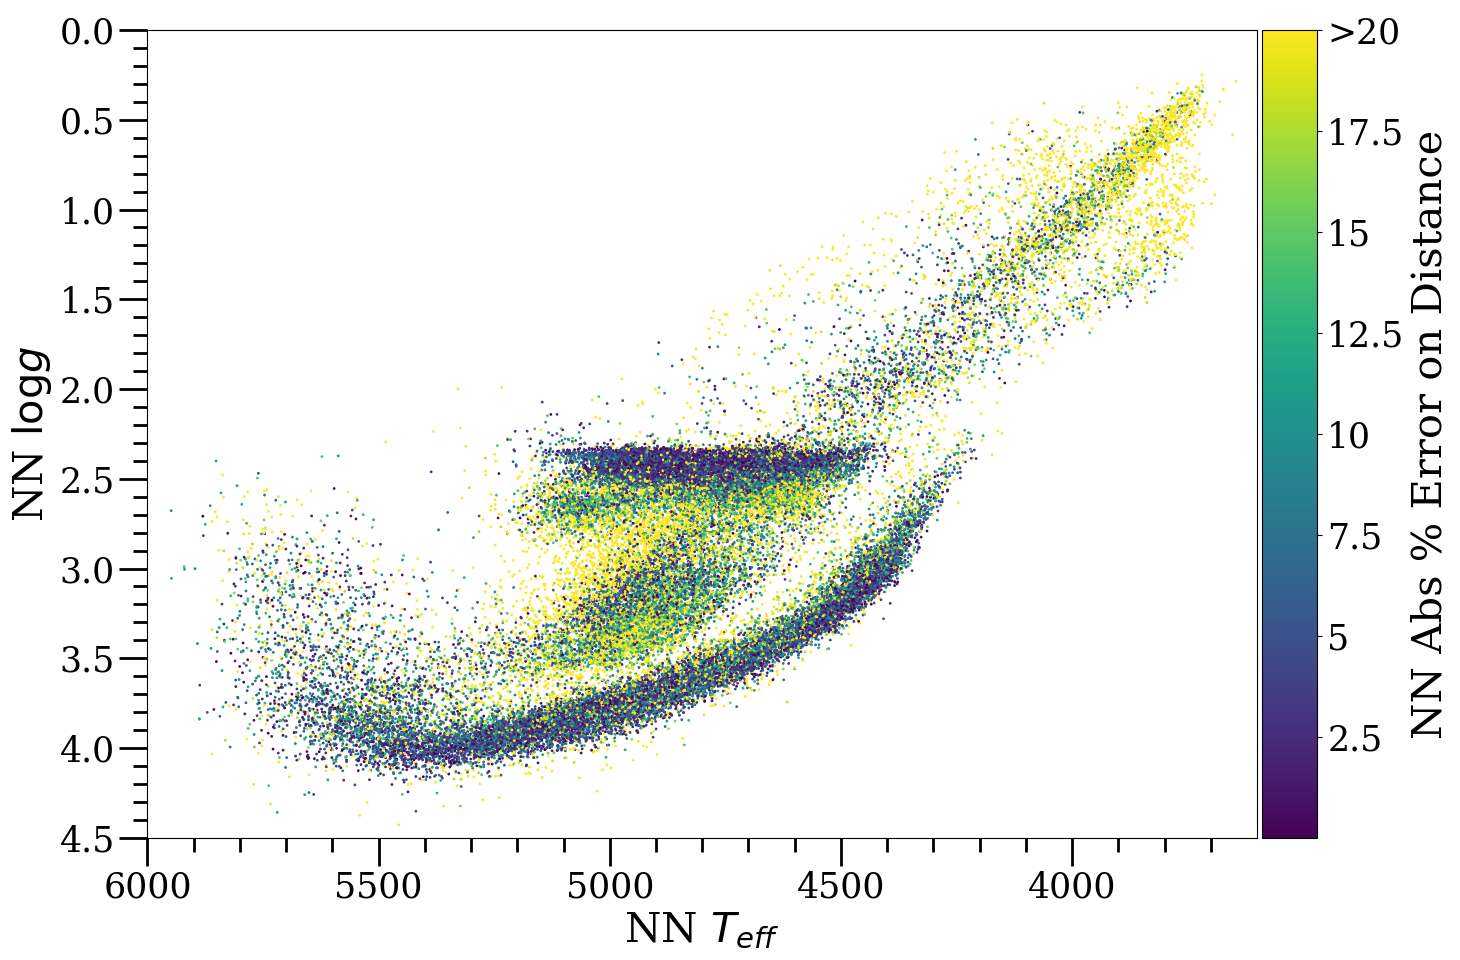

In [7]:
%matplotlib inline
import numpy as np
import pylab as plt
from astropy.io import fits
from astroNN.apogee import allstar
from astroNN.datasets.apogee_distances import load_apogee_distances
from astroNN.gaia import fakemag_to_logsol
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font', **{'family': 'serif', 'weight': 'medium', 'size': 20})

ra, dec, distance, distance_err = load_apogee_distances(cuts=.2, keepdims=True)

f_dist = fits.getdata("apogee_dr14_nn_dist_cuts_005.fits")
f_chem = fits.getdata("astroNN_apogee_dr14_catalog.fits")
allstar_dr14 = fits.getdata(allstar(dr=14))

nn_teff = f_chem['astroNN'][:, 0]
nn_teff_error = f_chem['astroNN_error'][:, 0]
nn_logg = f_chem['astroNN'][:, 1]
nn_logg_error = f_chem['astroNN_error'][:, 1]
nn_feh = f_chem['astroNN'][:, 19]
nn_feh_error = f_chem['astroNN_error'][:, 19]
dist = f_dist['pc']
fakemag = f_dist['fakemag']
dist_err = f_dist['pc_error']

good_idx = [(dist / dist_err >= 1.) & (nn_teff / nn_teff_error > 1.) & (nn_logg / nn_logg_error > 1.) & 
            (nn_logg_error < 1.) & (fakemag > 0.) & (allstar_dr14['STARFLAG'] == 0) & (distance / distance_err > 5.)]

good_idx_feh = [(dist / dist_err >= 1.) & (nn_feh_error < 1.)]

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx], nn_logg[good_idx], s=1., 
            c=np.clip(100*(np.abs(dist[good_idx] - distance[good_idx]) / (distance[good_idx])), 0, 20), 
            rasterized=True)
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel('NN ' + '$\log{g}$', fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((0.0, 4.5))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.set_yticklabels(["2.5", "5", "7.5", "10", "12.5", "15", "17.5", ">20"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN Abs % Error on Distance", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()